# PROBLEM STATEMENT

# a) Defining the question

We have been tasked to understand electric car usage. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

# b)Defining the metric of success

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.


---

**HYPOTHESIS 1**
> Our Null Hypothesis to test is: **"More blue electric cars are taken over the weekdays in area 75001 than in area 75002"**.

> Alternative: **"More blue electric cars are taken over the weekdays in area 75002 than in area 75001"**

> Our selected periods of interest will be **weekdays**.

**HYPOTHESIS 2:**
> Null Hypothesis: **"More blue electric cars are taken over the weekdays than on weekends"**

> Alternative Hypothesis: **"More blue electric cars are taken over the weekends than on weekdays"**



# c) Recording the experimental design




---




To work on this project, we will perform the following analysis with Python;
1. Defining the question.
2. Finding and dealing with outliers, anomalies, and missing data within the dataset.
3. Performing univariate, bivariate analysis and recording our observations 
4. Implement the solution by performing hypothesis testing.




# d)Data Relevance

The data set is relevant for the analysis process.It containsa daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

# Importing Libraries

In [ ]:
import pandas as pd #python library to analyze tabular data(data frames)
import numpy as np # for working with arrays
import seaborn as sns #for exploring and understand data using stattistical graphs
import matplotlib #for creating interactive visualizations 
from matplotlib import pyplot as plt #API for matplotlib used for graphic visualizations

# Loading the Dataset



In [ ]:
# Loading and viewing the dataset
df = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')

# previewing first 5 rows of dataset
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Checking the Dataset

In [ ]:
# Checking information about the dataset
df.info()

# Our data is in the right data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# Show number of rows and columns using df.shape
print("Number of rows: {}" .format(df.shape[0]));
print("Number of columns: {}" .format(df.shape[1]));

Number of rows: 16085
Number of columns: 13


In [ ]:
# Checking for null values
df.isnull().sum() 

# We have 0 null values in the dataset columns

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
# Checking for duplicates.
df.duplicated().sum()

# The results show no duplicate available

0

In [ ]:
# checking for anomalies
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
# Checking for ouliers 
blue_cars_taken = df['BlueCars_taken_sum']
outliers = []
def bluecars_outliers(blue_cars):
  mean = blue_cars_taken.mean()
  stdev = blue_cars_taken.std()
  threshold = 3
  for y in blue_cars_taken:
    z_score = (y - mean) / stdev
  if z_score > threshold:
    outliers.append(y)
  return outliers
bluecars_outliers(df['BlueCars_taken_sum'])

# The results show no outliers present

[]

# Data Cleaning

Formatting Column Names

In [ ]:
#setting all columns names to be in lowercase and spaced by _ underscore
cols = df.columns.tolist()
for col in range(len(cols)):
  cols[col] = cols[col].lower().replace(" ", "_")

df.columns = cols

# previewing dataframe
df.head()

# This results in column names being formatted to be in lowercase and words separated with _ underscore

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Dropping unwnted column
df.drop(df[["n_daily_data_points"]], axis=1, inplace=True)

# previewing dataframe
df.head()

# After running the code the data frame appears with the unwanted "n_daily_data_points" column removed

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Confirming removal of one column
print("Number of rows: {}" .format(df.shape[0]));
print("Number of columns: {}" .format(df.shape[1]));

# From the results, the number of columns is less than 1, from 13 to 12 while the number of rows remains the same

Number of rows: 16085
Number of columns: 12


Filtering out Weekends because we chose to work with weekdays only for the second claim:

In [ ]:
# Filtering to obtain weekday data only
dfWeekday = df[df.day_type.isin(['weekday'])]

# previewing new week days dataframe
dfWeekday.head()

#The result is a column with only weekday data

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# confirming removal of weekend data
print("In the previous df, day_type column shows values of: ")
print(pd.unique(df['day_type']))

In the previous df, day_type column shows values of: 
['weekday' 'weekend']


In [ ]:
# Dataset with weekday columns only
print("After removing weekends from df, the new dfWeekday's day_type column shows only values of: ")
print(pd.unique(dfWeekday['day_type']))

After removing weekends from df, the new dfWeekday's day_type column shows only values of: 
['weekday']


In [ ]:
# Filtering to obtain weekend data only
dfWeekend = df[df.day_type.isin(['weekend'])]

# previewing new week days dataframe
dfWeekend.head()
#The result is a column with only weekend data

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5,75001,1/6/2018,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,5,weekend,217,217,2,2,25,25,41,39


In [ ]:
# confirming removal of weekday data
print("In the previous df, day_type column shows values of: ")
print(pd.unique(df['day_type']))

In the previous df, day_type column shows values of: 
['weekday' 'weekend']


In [ ]:
print("After removing weekends from df, the new dfWeekday's day_type column shows only values of: ")
print(pd.unique(dfWeekend['day_type']))

After removing weekends from df, the new dfWeekday's day_type column shows only values of: 
['weekend']


Data frame with area 1(With Postal code 75001) only



In [ ]:
# creating area1 data frame with only rows with postal code 75001 for area 1
area1 = dfWeekday[dfWeekday.postal_code.isin([75001])]
area1.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# confirming postal codes in area 1 data frame by listing
print(pd.unique(area1['postal_code']))

# We can see it only has one postal code 75001 for area 1

[75001]


In [ ]:
# Checking number of rows and columns using df.shape
print("Number of rows: {}" .format(area1.shape[0]));
print("Number of columns: {}" .format(area1.shape[1]));

# Number of rows has reduced from 16085 to 112

Number of rows: 112
Number of columns: 12


Data frame with area 2(With Postal code 75002) only

In [ ]:
# creating area2 data frame with only rows with postal code 75002 for area 2
area2 = dfWeekday[dfWeekday.postal_code.isin([75002])]
area2.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
156,75002,1/1/2018,0,weekday,145,138,4,6,12,11,30,29
157,75002,1/2/2018,1,weekday,137,125,6,4,8,8,32,31
158,75002,1/3/2018,2,weekday,166,165,3,3,16,17,31,33
159,75002,1/4/2018,3,weekday,131,135,6,7,13,12,32,32
160,75002,1/5/2018,4,weekday,165,165,2,2,11,11,34,32


In [ ]:
# confirming postal codes in area 2 data frame by listing
print(pd.unique(area2['postal_code']))

# We can see it only has one postal code 75001 for area 1

[75002]


In [ ]:
# Checking number of rows and columns using df.shape
print("Number of rows: {}" .format(area2.shape[0]));
print("Number of columns: {}" .format(area2.shape[1]));

# Number of rows has reduced from 16085 to 112

Number of rows: 112
Number of columns: 12


We Notice that area 1 and area 2 have the same number of records(112)

Cleaned DataFrame with only the required period (weekdays) and the 2 areas we are combining with postal codes 75001 and 75002

In [ ]:
# Combining the two dataframes
df_clean = pd.concat([area1, area2])
df_clean.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# confirming postal codes in the cleaned data frame by listing
print(pd.unique(df_clean['postal_code']))

# We can see it has only 2 postal codes tht we are interested in: 75001 for area 1 and 75001 for area 2

[75001 75002]


In [ ]:
# Checking number of rows and columns using df.shape
print("Number of rows: {}" .format(df_clean.shape[0]));
print("Number of columns: {}" .format(df_clean.shape[1]));

# Number of rows of area1(112) and those of area 2(112) forms  combined datframe with 224 rows

Number of rows: 224
Number of columns: 12


# Univariate Analysis : Charts and Histograms

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


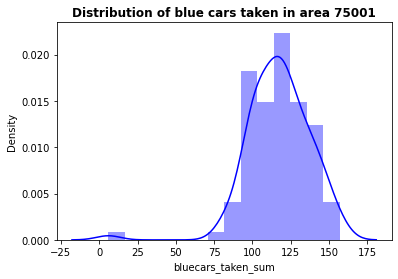

In [ ]:
# Distribution Plot for blue cars taken in area 1
sns.distplot(area1['bluecars_taken_sum'], color = 'blue')
plt.title('Distribution of blue cars taken in area 75001', fontweight = 'bold');
plt.show()
sns.set(rc = {'figure.figsize':(5,4)})

**OBSERVATIONS:**

1.   *The data for Blue cars in area 1 take an almost normal distribution*
2.   *The data for blue cars taken in area 1 is left skewed because it has extreme values lying on the left side*


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


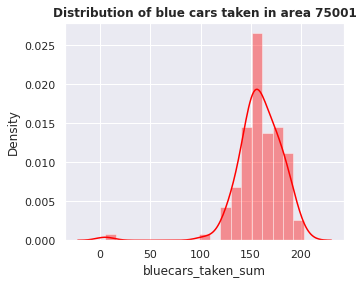

In [ ]:
# Distribution Plot for blue cars taken in area 2
sns.distplot(area2['bluecars_taken_sum'], color = 'red')
plt.title('Distribution of blue cars taken in area 75001', fontweight = 'bold')
plt.show()

**OBSERVATION:**


1.   *The data for blue cars taken in area 2 is left skewed because it has extreme values lying on the left side*


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


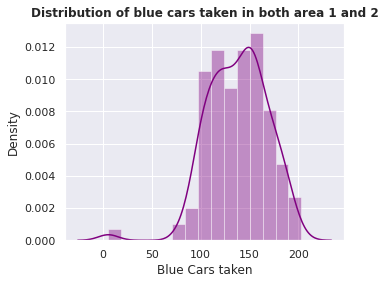

In [ ]:
# Distribution Plot for blue cars taken in both area 1 and 2
sns.distplot(df_clean['bluecars_taken_sum'], color = 'purple')
plt.xlabel('Blue Cars taken')
plt.title('Distribution of blue cars taken in both area 1 and 2', fontweight = 'bold')
plt.show()

**OBSERVATION:**


1.   *The data for blue cars taken in both areas 1 and 2 is left skewed because it has extreme values lying on the left side*


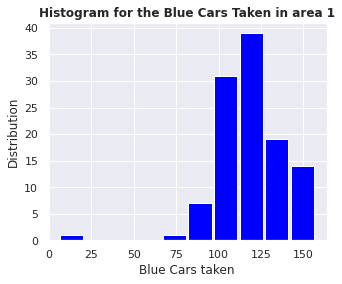

In [ ]:
# Plotting a Histogram for blue cars taken in area 1
plt.hist(area1['bluecars_taken_sum'], bins = 10, rwidth = 0.9, histtype='bar', color = 'blue')
plt.xlabel('Blue Cars taken')
plt.ylabel('Distribution')
plt.title('Histogram for the Blue Cars Taken in area 1', fontweight = 'bold')
plt.show()

**OBSERVATION:**

1.   *The data for blue cars taken in area 1 is left skewed because it has extreme values lying on the left side*


Text(0.5, 1.0, 'Histogram for the Blue Cars Taken')

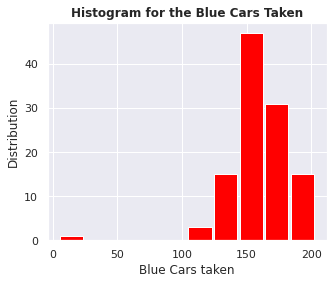

In [ ]:
# Plotting a Histogram for blue cars taken in area 2
plt.hist(area2['bluecars_taken_sum'], bins = 10, rwidth = 0.9, histtype='bar', color = 'red')
plt.xlabel('Blue Cars taken')
plt.ylabel('Distribution')
plt.title('Histogram for the Blue Cars Taken', fontweight = 'bold')

**OBSERVATION:**

1.   *The data for blue cars taken in area 2 is left skewed because it has extreme values lying on the left side*


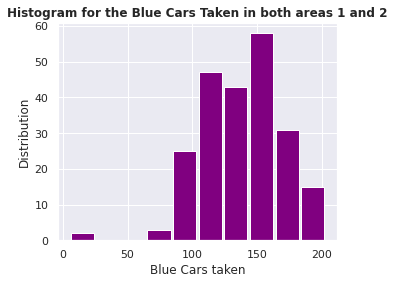

In [ ]:
# Plotting a Histogram for blue cars taken in both areas 1 and 2
plt.hist(df_clean['bluecars_taken_sum'], bins = 10, rwidth = 0.9, histtype='bar', color = 'purple')
plt.xlabel('Blue Cars taken')
plt.ylabel('Distribution')
plt.title('Histogram for the Blue Cars Taken in both areas 1 and 2', fontweight = 'bold')
sns.set(rc = {'figure.figsize':(5,4)})

**OBSERVATIONS:**

1.   *The data for Blue cars in both areas 1 and 2 take an almost normal distribution*
2.   *The data for blue cars taken in both areas 1 and 2 is left skewed because it has extreme values lying on the left side*


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


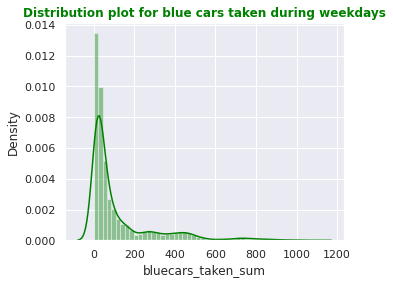

In [ ]:
# Distribution Plot of bluecars taken over weekdays in all postal codes
sns.distplot(dfWeekday['bluecars_taken_sum'], color= 'green')
plt.title('Distribution plot for blue cars taken during weekdays', fontweight = 'bold', color = 'green')
plt.show()

**OBSERVATION:**

   *The distribution plot shows data for Blue cars taken skews to the right. Most values are clustered around the left tail of the distribution



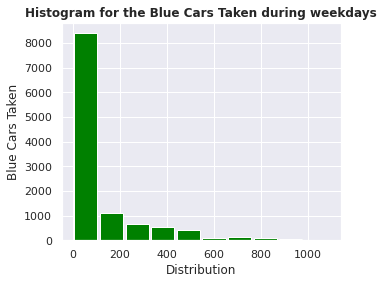

In [ ]:
# Plotting a Histogram for blue cars taken over weekdays in all postal codes
plt.hist(dfWeekday['bluecars_taken_sum'], bins = 10, rwidth = 0.9, histtype='bar', color = 'green')
plt.xlabel('Distribution')
plt.ylabel('Blue Cars Taken')
plt.title('Histogram for the Blue Cars Taken during weekdays', fontweight = 'bold')
plt.show()

**OBSERVATION:**

   *The Histogram shows data for Blue cars taken skews to the right. Most values are clustered around the left tail of the distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


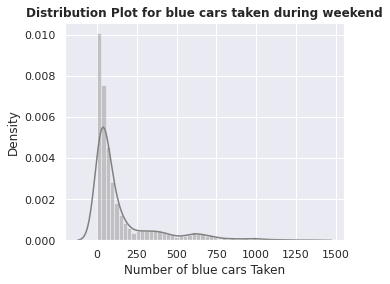

In [ ]:
# Distribution Plot of bluecars taken over weekend in all postal codes
sns.distplot(dfWeekend['bluecars_taken_sum'], color= 'grey')
plt.xlabel('Number of blue cars Taken')
plt.title('Distribution Plot for blue cars taken during weekend', fontweight = 'bold')
plt.show()

**OBSERVATION:**

   *The distribution plot shows data for Blue cars taken skews to the right. Most values are clustered around the left tail of the distribution

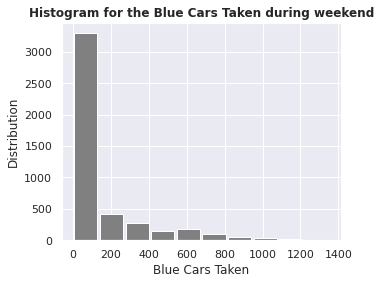

In [ ]:
# Plotting a Histogram for blue cars taken over weekend in all postal codes
plt.hist(dfWeekend['bluecars_taken_sum'], bins = 10, rwidth = 0.9, histtype='bar', color = 'grey')
plt.xlabel('Blue Cars Taken')
plt.ylabel('Distribution')
plt.title('Histogram for the Blue Cars Taken during weekend', fontweight = 'bold')
plt.show()

**OBSERVATION:**

   *The Histogram shows data for Blue cars taken skews to the right. Most values are clustered around the left tail of the distribution*

# Bivariate Analysis

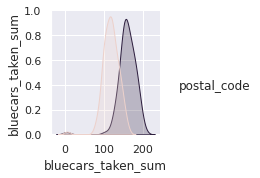

In [ ]:
# Ploting a bivariate summary of the number of blue cars taken based on to postal code
sns.pairplot(df_clean[['bluecars_taken_sum','postal_code']], hue = 'postal_code')
sns.set(rc = {'figure.figsize':(6,5)})
# viewing our plot
plt.show()

# The output shows area 1 plot in faint pink and area 2 plot in grey

**OBSERVATIONS:**


1.   *The data for blue cars taken in both areas 1 and 2 is left skewed because it has extreme values lying on the left side*
2. *The data for blue cars taken in both areas 1 and 2 ranges from 75 to 200 approximately*

<function matplotlib.pyplot.show(*args, **kw)>

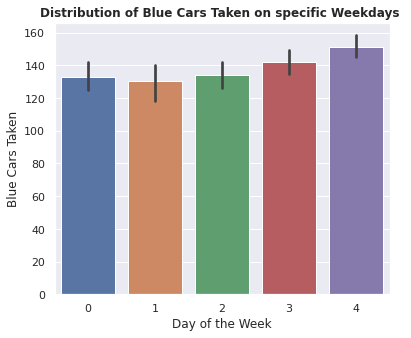

In [ ]:
# Plotting a bar graph to show blue cars taken on specific weekdays in both areas
sns.barplot(data =df_clean, y='bluecars_taken_sum', x= 'dayofweek')
plt.title('Distribution of Blue Cars Taken on specific Weekdays ', fontweight = 'bold')
plt.xlabel('Day of the Week')
plt.ylabel('Blue Cars Taken')
sns.set(rc = {'figure.figsize':(5,4)})
plt.show

**OBSERVATIONS:** 
1. *Although minimal, there is a slight increase of blue cars taken as the week progresses ( 0 to represent Monday)*
2. Most blue cars are taken on Fridays(Day 4)
3. Least number of blue cars taken is on Tuesdays(Day 1)

<function matplotlib.pyplot.show(*args, **kw)>

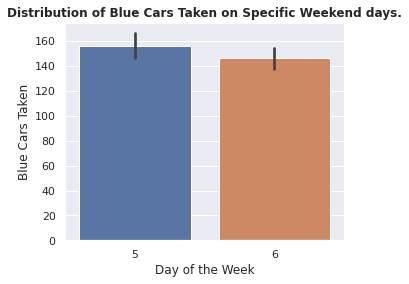

In [ ]:
# Plotting a bar graph to show blue cars taken on specific weekend days(Saturday and Sunday)
sns.barplot(data =dfWeekend, y='bluecars_taken_sum', x= 'dayofweek')
plt.title('Distribution of Blue Cars Taken on Specific Weekend days.', fontweight = 'bold')
plt.xlabel('Day of the Week')
plt.ylabel('Blue Cars Taken')
sns.set(rc = {'figure.figsize':(5,4)})
plt.show

**OBSERVATION**: *More blue cars are taken on Saturday(Day 5) than on Sunday(Day 6)*

In [ ]:
# Calculating the pearson coefficient for area 1
pearson_coeff = area1['bluecars_taken_sum'].corr(area1['dayofweek'], method="pearson") 
print(pearson_coeff)

0.3773561461860036


**OBSERVATION:**

   *Correlation of 0.377 indicate a weak positive correlation between the 2 variables*

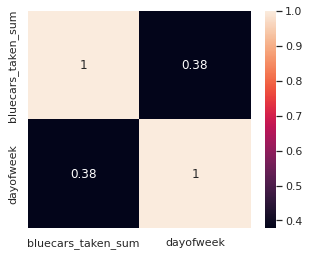

In [ ]:
# Heat map showing the correlation of variables
sns.heatmap(area1[['bluecars_taken_sum', 'dayofweek' ]].corr(),annot=True)

# viewing our plot
plt.show()

In [ ]:
# Calculating the pearson coefficient for area 2
pearson_coeff = area2['bluecars_taken_sum'].corr(area2['dayofweek'], method="pearson") 
print(pearson_coeff)

0.25266260293279136


**OBSERVATION:**

   *Correlation of 0.252 indicate a weak positive correlation between the 2 variables*

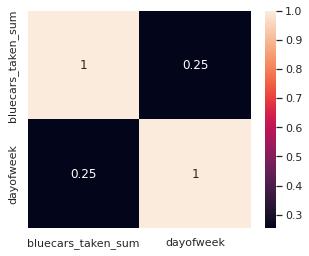

In [ ]:
# Heat map showing the correlation of variables in area 2
sns.heatmap(area2[['bluecars_taken_sum', 'dayofweek' ]].corr(),annot=True)

# viewing our plot
plt.show()

In [ ]:
# Calculating the pearson coefficient
pearson_coeff = dfWeekday['bluecars_taken_sum'].corr(dfWeekday['dayofweek'], method="pearson") 
print(pearson_coeff)

0.030798282931225707


**OBSERVATION:**

   *Correlation of 0.030 indicate a weak positive correlation between the 2 variables*

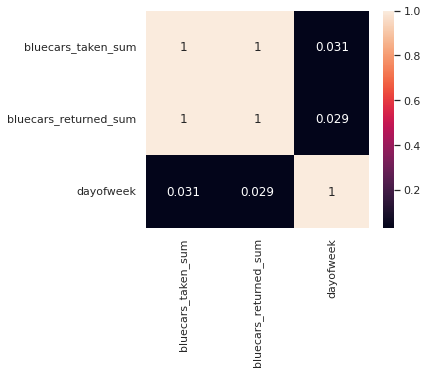

In [ ]:
# Plotting the heatmap to show us the correlation
sns.heatmap(dfWeekday[['bluecars_taken_sum', 'bluecars_returned_sum', 'dayofweek']].corr(),annot=True)
plt.show()

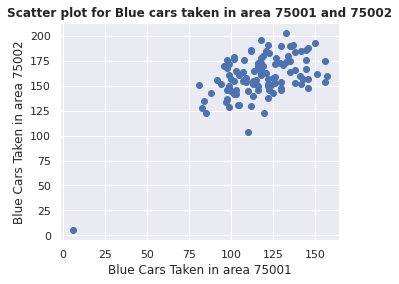

In [ ]:
# Plotting a scatter diagram
# We should check against day type.
plt.scatter(area1['bluecars_taken_sum'], area2['bluecars_taken_sum'])
plt.xlabel('Blue Cars Taken in area 75001')
plt.ylabel('Blue Cars Taken in area 75002')
# plt.ylabel('Blue Cars Returned')
plt.title('Scatter plot for Blue cars taken in area 75001 and 75002',fontweight = 'bold')
plt.show()

**OBSERVATION**: *There is no relationship between blue cars taken in area 1 and 2*

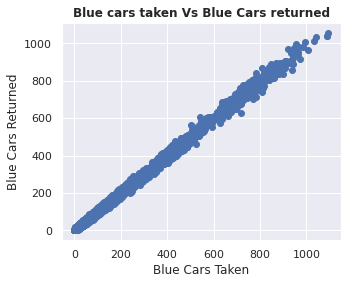

In [ ]:
# Plotting a scatter diagram
# We should check against day type.
plt.scatter(dfWeekday['bluecars_taken_sum'], dfWeekday['bluecars_returned_sum'])
plt.xlabel('Blue Cars Taken')
plt.ylabel('Blue Cars Returned')
plt.title('Blue cars taken Vs Blue Cars returned', fontweight = 'bold')
plt.show()

Observation: **Blue cars taken and blue cars returned are directly proportional i.e as the number of blue cars taken increase the number of blue cars returned increase**

# Stratified Sampling



## **Hypothesis 1**

In [ ]:
#  Getting a sample of 1000 and previewing the distribution of our main variable
df_clean_sample = df_clean.groupby('postal_code', group_keys = False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
print(df_clean_sample['postal_code'].value_counts())
df_clean_sample.head()

75001    11
75002    11
Name: postal_code, dtype: int64


,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
104,75001,4/18/2018,2,weekday,124,124,2,2,17,18,16,17
38,75001,2/8/2018,3,weekday,113,112,5,5,9,9,15,15
127,75001,5/22/2018,1,weekday,142,144,4,4,12,12,30,32
61,75001,3/6/2018,1,weekday,122,121,2,2,6,6,23,23
46,75001,2/16/2018,4,weekday,130,130,0,0,11,12,27,28


In [ ]:
# Getting the population mean for the Blue cars taken in area 1
area1_pop_mean  = area1['bluecars_taken_sum'].mean()
area1_pop_mean


117.24107142857143

In [ ]:
# Getting the population mean for the Blue cars in area 2
area2_pop_mean  = area2['bluecars_taken_sum'].mean()
area2_pop_mean

158.95535714285714

In [ ]:
# Getting the sample mean for the Blue cars taken in area 1
area_ = [75001]
area1_sample = df_clean_sample[df_clean_sample.postal_code.isin(area_)]
area1_sample.head()
area1_sample_mean  = area1_sample['bluecars_taken_sum'].mean()
area1_sample_mean


116.0909090909091

In [ ]:
# Getting the sample mean for the Blue cars taken in area 2
area_ = [75002]
area2_sample = df_clean_sample[df_clean_sample.postal_code.isin(area_)]
area2_sample.head()
area2_sample_mean  = area2_sample['bluecars_taken_sum'].mean()
area2_sample_mean

171.45454545454547

In [ ]:
# Calculating the sample std deviation
sample_std = area1_sample['bluecars_taken_sum'].std()
sample_std

16.238562408381757

In [ ]:
# Calculating the z-score
# sample mean minus population mean divided by standard deviation
z = (area1_sample_mean - area1_pop_mean) / sample_std
z


-0.07082907394983838

In [ ]:
# Calculating the p value
import scipy.stats as stats
from scipy.stats import norm
p_value = stats.norm.cdf(z)
p_value

0.47176689613121603

In [ ]:
#  Intepreting the p value
# The set alpha = 0.05 or 5%
alpha = 0.05
if p_value > alpha:
  print('We fail to reject the null hypothesis')
else:
  print('We reject the null hypothesis')

We fail to reject the null hypothesis





THEREFORE: **More blue electric cars are taken over the weekdays in area 75001 than in area 75002**

## **Hypothesis 2**

In [ ]:
#  Getting a sample of 1000 and previewing the distribution of our main variable
df2 = df.groupby('day_type', group_keys = False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
print(df2['day_type'].value_counts())
df2.head()

weekday    1154
weekend     454
Name: day_type, dtype: int64


,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
8426,92370,1/18/2018,3,weekday,32,30,0,0,0,0,0,0
4130,91370,3/20/2018,1,weekday,8,9,0,0,0,1,0,0
3805,78150,3/7/2018,2,weekday,27,26,1,1,2,0,0,0
6951,92260,4/4/2018,2,weekday,30,29,0,1,0,0,0,0
2988,75020,1/25/2018,3,weekday,405,395,19,16,35,24,116,114


In [ ]:
# Getting the population mean for the Blue cars taken during the weekday
day = ['weekday']
df_weekday = df[df.day_type.isin(day)]
df_weekday.head()
weekday_pop_mean  = df_weekday['bluecars_taken_sum'].mean()
weekday_pop_mean

116.0286729036729

In [ ]:
# Getting the population mean for the Blue cars taken during the weekend
day = ['weekend']
df_weekend = df[df.day_type.isin(day)]
df_weekend.head()
weekend_pop_mean  = df_weekend['bluecars_taken_sum'].mean()
weekend_pop_mean

151.09006826690157

In [ ]:
# Getting the sample mean for the Blue cars taken during the weekday
day = ['weekday']
df2_weekday = df2[df.day_type.isin(day)]
df2_weekday.head()
weekday_sample_mean  = df2_weekday['bluecars_taken_sum'].mean()
weekday_sample_mean


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


119.09618717504333

In [ ]:
# Getting the sample mean for the Blue cars taken during the weekend
day = ['weekend']
df2_weekend = df2[df.day_type.isin(day)]
df2_weekend.head()
weekend_sample_mean  = df2_weekend['bluecars_taken_sum'].mean()
weekend_sample_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


157.00881057268722

In [ ]:
# Calculating the sample std deviation
sample_std = df2_weekday['bluecars_taken_sum'].std()
sample_std

176.18728780592826

In [ ]:
# Calculating the z-score
# sample mean minus population mean divided by standard deviation
z = (weekday_sample_mean - weekday_pop_mean) / sample_std
z

0.01741053119989746

In [ ]:
# Calculating the p value
import scipy.stats as stats
from scipy.stats import norm
p_value = stats.norm.cdf(z)
p_value

0.5069454461265404

In [ ]:
#  Intepreting the p value
# The set alpha = 0.05 or 5%
alpha = 0.05
if p_value > alpha:
  print('We fail to reject the null hypothesis')
else:
  print('We reject the null hypothesis')

We fail to reject the null hypothesis


THEREFORE: **More blue electric cars are taken over the weekdays than the weekend**